In [ ]:
import matplotlib.pylab as plt
import numpy as np
import re
import os
import csv
import pandas as pd
import matplotlib
import copy
import cantera as ct
from rmgpy.chemkin import load_chemkin_file
%matplotlib inline

In [ ]:
path_chemkin='./chemkin/chem_annotated.inp'
species_dictionary='./chemkin/species_dictionary.txt'
transport_path='./chemkin/tran.dat'

spec_RMG, reac_RMG = load_chemkin_file(path_chemkin, dictionary_path=species_dictionary, transport_path=transport_path)

In [ ]:
for reac in reac_RMG:
    try: 
        print(reac.family)
    except AttributeError as e: 
        print('PDEP')

In [ ]:
for spec in spec_RMG:
    if spec.to_cantera().composition == {'C': 4.0, 'F': 8.0}:# 'H': 1.0}:#, 'F': 9.0}:
        print(spec, spec.smiles)

In edge

In [ ]:
path_chemkin='./chemkin/chem_edge_annotated.inp'
species_dictionary='./chemkin/species_edge_dictionary.txt'
transport_path='./chemkin/tran.dat'

spec_RMG, reac_RMG = load_chemkin_file(path_chemkin, dictionary_path=species_dictionary, transport_path=transport_path)

In [ ]:
for reac in reac_RMG:
    try: 
        print(reac.family)
    except AttributeError as e: 
        print('PDEP')

In [ ]:
for spec in spec_RMG:
    if spec.to_cantera().composition == {'C': 4.0, 'F': 8.0}:# 'H': 1.0}:#, 'F': 9.0}:
        if 'u2' in spec.to_adjacency_list():
            print(spec, spec.smiles)
#F[C]C(F)(F)C(F)(F)C(F)(F)F-2(270) F[C]C(F)(F)C(F)(F)C(F)(F)F this has 2 electrons unpaired
#this has a lone pair C4F8(169)

In [ ]:
for reac in reac_RMG:
    species = [x.index for x in reac.products+reac.reactants]
    if 270 in species and 134 in species and 29 in species:
        print(reac, reac.index)
#with lone pairs, this is from carolines data

In [ ]:
for reac in reac_RMG:
    species = [x.index for x in reac.products+reac.reactants]
    if 169 in species and 134 in species and 29 in species:
        print(reac, reac.index)
#this is from pdep reactions

In [ ]:
for reac in reac_RMG:
        try:
            reac.family
            if reac.family=='1+2_Cycloaddition':
                display(reac)
                print(reac.kinetics.comment)
        except AttributeError as e: 
            pass
#this is from pdep reactions

In [ ]:
rea

In [ ]:
dir(reac)

# Can RMG even make the reactions we want it to? 

In [1]:
import sys
sys.path.append('/Users/khalil.nor/Code/RMG-Py')

In [4]:
#modeling index 27 training reaction from 1+2_Cycloaddition
#C3F7-c_FCOC(O) <=> C3F7CF+CO2
from rmgpy.species import Species
from rmgpy.molecule import Molecule
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM
from rmgpy import settings
import time
import sys
import matplotlib.pyplot as plt
import matplotlib

In [5]:
C3F7_c_FCOC_O_mol = Molecule(smiles = 'O=C1OC1(F)C(F)(F)C(F)(F)C(F)(F)F') 
C3F7CF_mol = Molecule(smiles = 'F[C]C(F)(F)C(F)(F)C(F)(F)F')
C3F7CF_adj_list = '''1 F u0 p3 c0 {9,S}
2 F u0 p3 c0 {9,S}
3 F u0 p3 c0 {10,S}
4 F u0 p3 c0 {10,S}
5 F u0 p3 c0 {11,S}
6 F u0 p3 c0 {11,S}
7 F u0 p3 c0 {11,S}
8 F u0 p3 c0 {12,S}
9 C u0 p0 c0 {1,S} {2,S} {10,S} {11,S}
10 C u0 p0 c0 {3,S} {4,S} {9,S} {12,S}
11 C u0 p0 c0 {5,S} {6,S} {7,S} {9,S}
12 C u0 p1 c0 {8,S} {10,S}'''

C3F7CF_mol.from_adjacency_list(C3F7CF_adj_list)

CO2_mol = Molecule(smiles = 'O=C=O')

C3F7_c_FCOC_O = Species(molecule = [C3F7_c_FCOC_O_mol])

C3F7CF = Species(molecule=[C3F7CF_mol]) 

CO2 = Species(molecule =[CO2_mol])

In [45]:
print('Confirming adjacency list of C3F7CF')
print(C3F7CF.to_adjacency_list())

Confirming adjacency list of C3F7CF
F[C]C(F)(F)C(F)(F)C(F)(F)F
1  F u0 p3 c0 {9,S}
2  F u0 p3 c0 {9,S}
3  F u0 p3 c0 {10,S}
4  F u0 p3 c0 {10,S}
5  F u0 p3 c0 {11,S}
6  F u0 p3 c0 {11,S}
7  F u0 p3 c0 {11,S}
8  F u0 p3 c0 {12,S}
9  C u0 p0 c0 {1,S} {2,S} {10,S} {11,S}
10 C u0 p0 c0 {3,S} {4,S} {9,S} {12,S}
11 C u0 p0 c0 {5,S} {6,S} {7,S} {9,S}
12 C u0 p1 c0 {8,S} {10,S}



In [20]:
thermo_libs = [
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ['1+2_Cycloaddition', 'R_Recombination'] 


database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )


testing
testing
testing
testing


In [54]:
generated_reactions = database.kinetics.generate_reactions_from_families(reactants = [C3F7CF_mol, CO2_mol], products = [C3F7_c_FCOC_O_mol], only_families='1+2_Cycloaddition')

ERROR:root:Could not update atomtypes for this molecule:
multiplicity -187
1  *1 O u0 p2 c0 {3,S} {4,S}
2     O u0 p2 c0 {3,D}
3  *2 C u0 p0 c0 {1,S} {2,D} {4,S}
4  *3 F u0 p2 c0 {1,S} {3,S} {12,S}
5     F u0 p3 c0 {12,S}
6     F u0 p3 c0 {13,S}
7     F u0 p3 c0 {13,S}
8     F u0 p3 c0 {14,S}
9     F u0 p3 c0 {14,S}
10    F u0 p3 c0 {14,S}
11    F u0 p3 c0 {15,S}
12    C u0 p0 c0 {4,S} {5,S} {13,S} {14,S}
13    C u0 p0 c0 {6,S} {7,S} {12,S} {15,S}
14    C u0 p0 c0 {8,S} {9,S} {10,S} {12,S}
15    C u0 p1 c0 {11,S} {13,S}

ERROR:root:Could not update atomtypes for this molecule:
multiplicity -187
1     O u0 p2 c0 {3,D}
2  *1 O u0 p2 c0 {3,S} {4,S}
3  *2 C u0 p0 c0 {1,D} {2,S} {4,S}
4  *3 F u0 p2 c0 {2,S} {3,S} {12,S}
5     F u0 p3 c0 {12,S}
6     F u0 p3 c0 {13,S}
7     F u0 p3 c0 {13,S}
8     F u0 p3 c0 {14,S}
9     F u0 p3 c0 {14,S}
10    F u0 p3 c0 {14,S}
11    F u0 p3 c0 {15,S}
12    C u0 p0 c0 {4,S} {5,S} {13,S} {14,S}
13    C u0 p0 c0 {6,S} {7,S} {12,S} {15,S}
14    C u0 p0 c0 {8,S

testing
Unable to determine atom type for atom F, which has 3 single bonds, 0 double bonds (0 to O, 0 to S, 0 others), 0 triple bonds, 0 quadruple bonds, 0 benzene bonds, 2 lone pairs, and +0 charge.
Unable to determine atom type for atom F, which has 3 single bonds, 0 double bonds (0 to O, 0 to S, 0 others), 0 triple bonds, 0 quadruple bonds, 0 benzene bonds, 2 lone pairs, and +0 charge.
Unable to determine atom type for atom F, which has 3 single bonds, 0 double bonds (0 to O, 0 to S, 0 others), 0 triple bonds, 0 quadruple bonds, 0 benzene bonds, 2 lone pairs, and +0 charge.
Unable to determine atom type for atom F, which has 3 single bonds, 0 double bonds (0 to O, 0 to S, 0 others), 0 triple bonds, 0 quadruple bonds, 0 benzene bonds, 2 lone pairs, and +0 charge.
Unable to determine atom type for atom F, which has 3 single bonds, 0 double bonds (0 to O, 0 to S, 0 others), 0 triple bonds, 0 quadruple bonds, 0 benzene bonds, 2 lone pairs, and +0 charge.
Unable to determine atom type fo

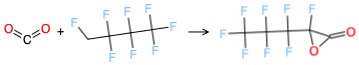

In [55]:
for rxn in generated_reactions:
    display(rxn)

In [56]:
template = database.kinetics.families['1+2_Cycloaddition'].retrieve_template(rxn.template)
kinetics_for_rxn = database.kinetics.families['1+2_Cycloaddition'].get_kinetics_for_template(template, degeneracy=rxn.degeneracy)[0]

In [57]:
kinetics_for_rxn
#I am assuming that these kinetics are different from the training reaction becaause it is in the opposite direction

ArrheniusBM(A=(1.54898e+06,'m^3/(mol*s)'), n=0.652409, w0=(572.5,'kJ/mol'), E0=(22.0859,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=0.0, var=33.13686319048999, Tref=1000.0, N=1, data_mean=0.0, correlation='Root_Ext-3R-R_Ext-3R-R_N-4R!H->O_4BrCClF->F_5R!H->C_Ext-5C-R_6R!H->C_Ext-6C-R_7R!H->C',), comment="""BM rule fitted to 1 training reactions at node Root_Ext-3R-R_Ext-3R-R_N-4R!H->O_4BrCClF->F_5R!H->C_Ext-5C-R_6R!H->C_Ext-6C-R_7R!H->C
    Total Standard Deviation in ln(k): 11.540182761524994
Exact match found for rate rule [Root_Ext-3R-R_Ext-3R-R_N-4R!H->O_4BrCClF->F_5R!H->C_Ext-5C-R_6R!H->C_Ext-6C-R_7R!H->C]
Euclidian distance = 0
Multiplied by reaction path degeneracy 2.0
family: 1+2_Cycloaddition""")

In [59]:
dir(kinetics_for_rxn)

['A',
 'E0',
 'Pmax',
 'Pmin',
 'Tmax',
 'Tmin',
 '_A',
 '_E0',
 '_Pmax',
 '_Pmin',
 '_Tmax',
 '_Tmin',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_n',
 '_w0',
 'change_rate',
 'comment',
 'discrepancy',
 'fit_to_reactions',
 'get_activation_energy',
 'get_rate_coefficient',
 'is_identical_to',
 'is_pressure_dependent',
 'is_similar_to',
 'is_temperature_valid',
 'n',
 'set_cantera_kinetics',
 'to_arrhenius',
 'to_html',
 'uncertainty',
 'w0']